<a href="https://colab.research.google.com/github/abiyasa05/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**Tugas Praktikum**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


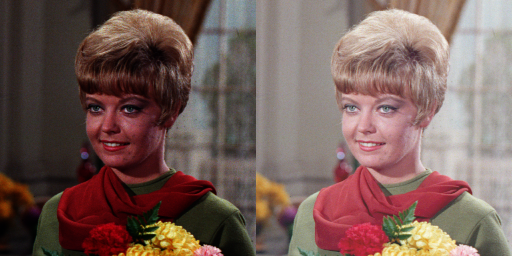

In [4]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000 000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

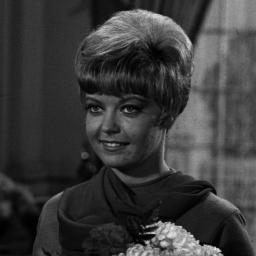

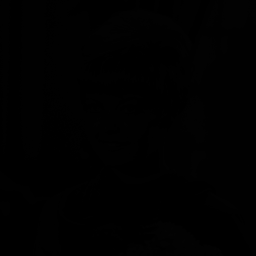

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Inisialisasi citra kedalaman
depth_image = np.zeros(original.shape, dtype=np.uint8)

# Kuantisasi citra ke bit kedalaman yang lebih rendah
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(round(original[i, j] / level))

# Menampilkan citra asli dan citra dengan kedalaman bit yang lebih rendah
cv2_imshow(original)
cv2_imshow(depth_image)

**3.   Buat modul Average Denoising**



Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

Nilai PSNR adalah 27.532095538744624 (dB)


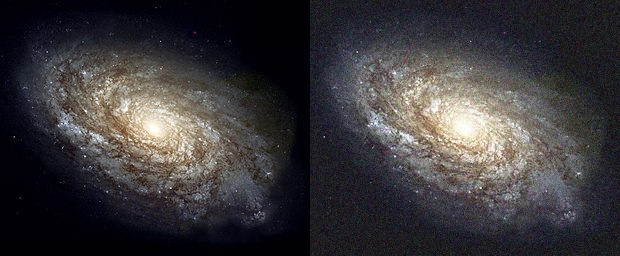

In [8]:
# 1. Jumlah Citra di Average - 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.519125398397748 (dB)


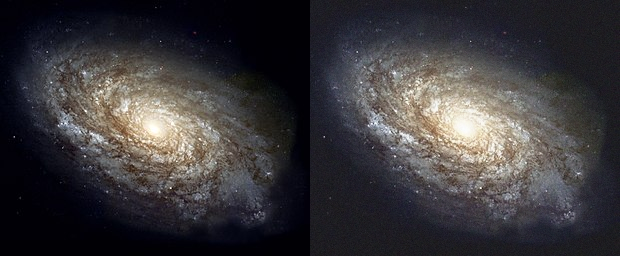

In [9]:
# 2. Jumlah Citra di Average - 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.495067278842946 (dB)


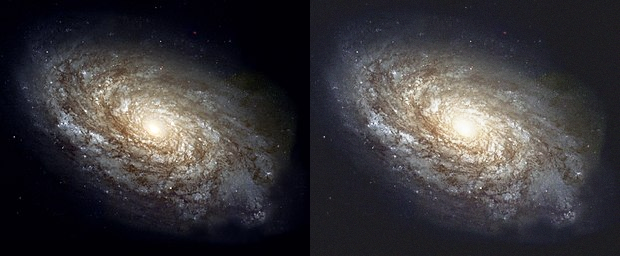

In [10]:
# 3. Jumlah Citra di Average - 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.506331164131105 (dB)


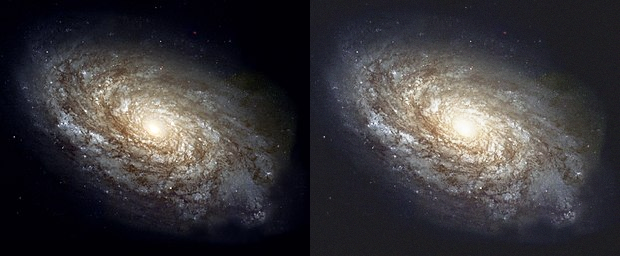

In [11]:
# 4. Jumlah Citra di Average - 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.510579071168596 (dB)


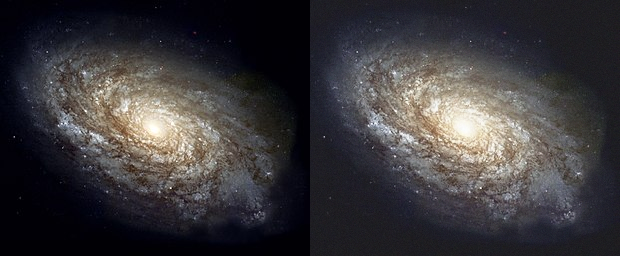

In [12]:
# 5. Jumlah Citra di Average - 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

4.   Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:


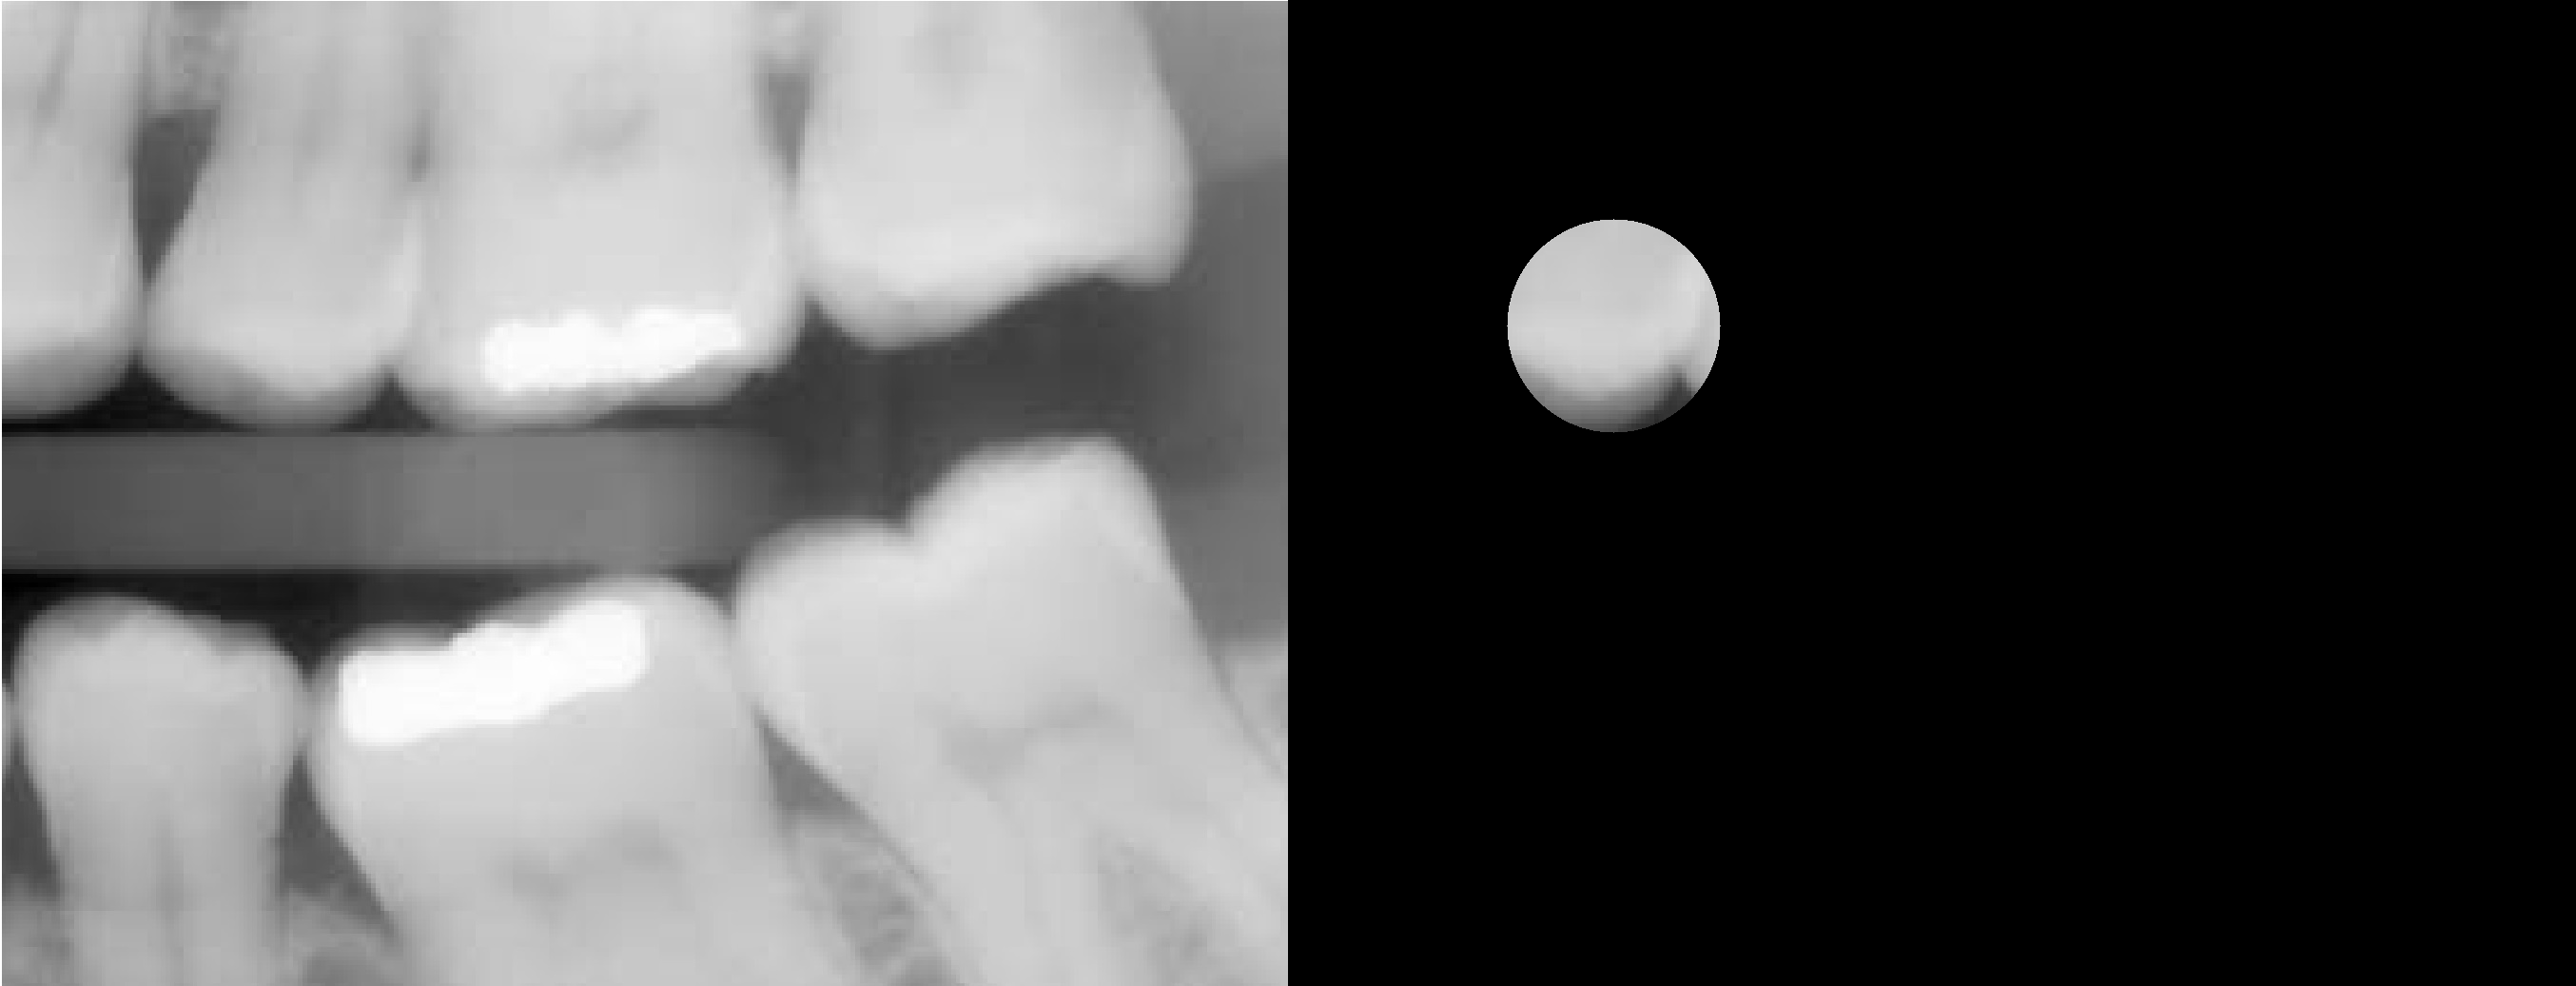

In [15]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img_t = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

# Inisialisasi mask dengan nol
mask = np.zeros(img_t.shape, dtype=np.uint8)

# Tentukan pusat dan radius lingkaran
center = (342, 342)  # Pusat lingkaran
radius = 112  # Radius lingkaran

# Buat lingkaran pada mask dengan warna putih (255,255,255)
mask = cv.circle(mask, center, radius, (255, 255, 255), -1)

# Operasi bitwise AND antara gambar asli dan mask
result = cv.bitwise_and(img_t, mask)

# Gabungkan gambar asli dan hasil
teeth_frame = cv.hconcat((img_t, result))

# Tampilkan gambar
cv2_imshow(teeth_frame)

5.   Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.



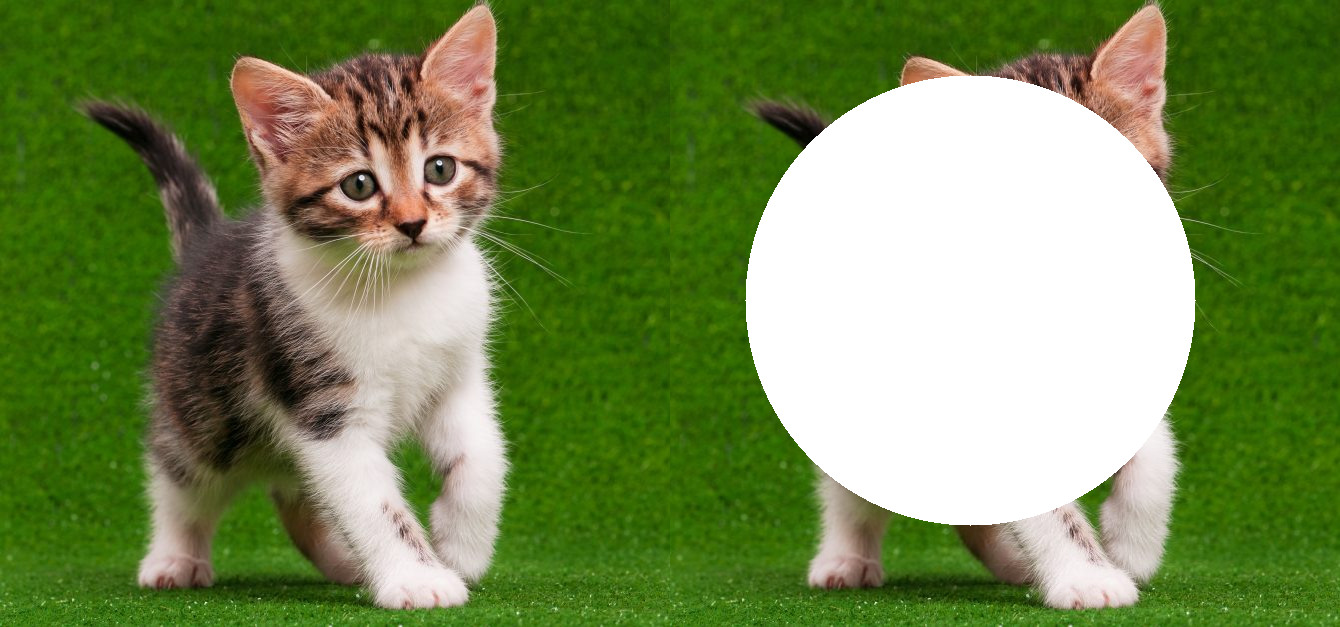

In [19]:
# Operator OR

img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

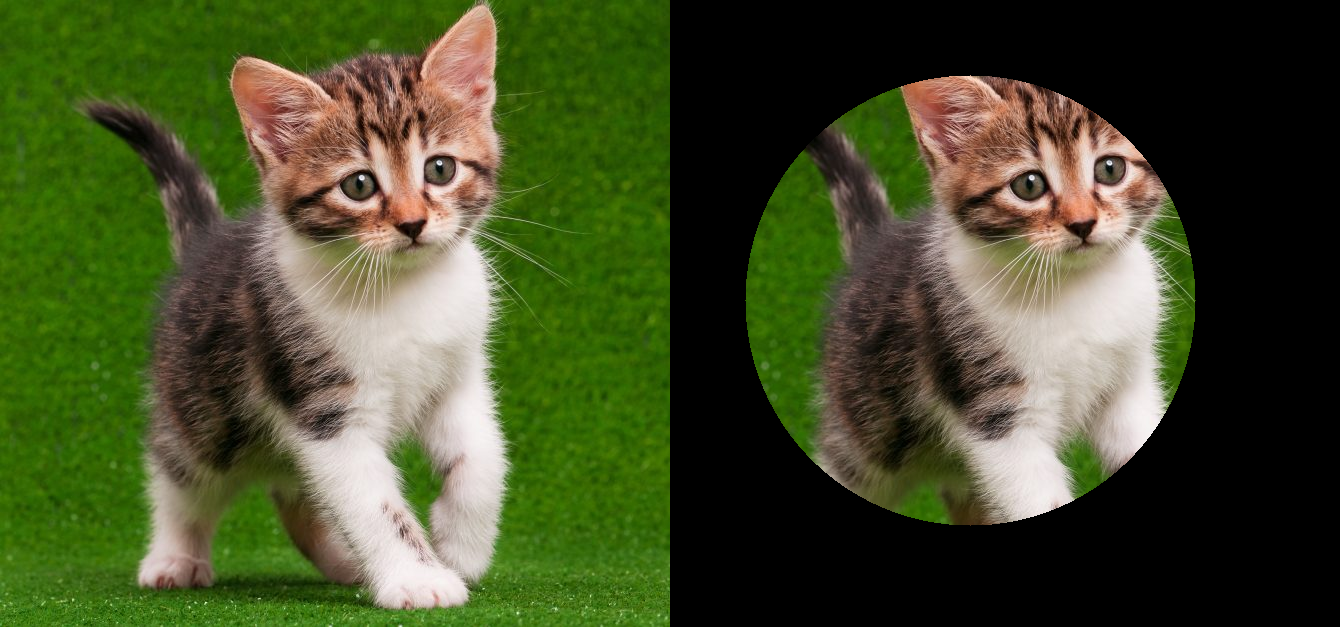

In [20]:
# Operator AND

img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org & mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

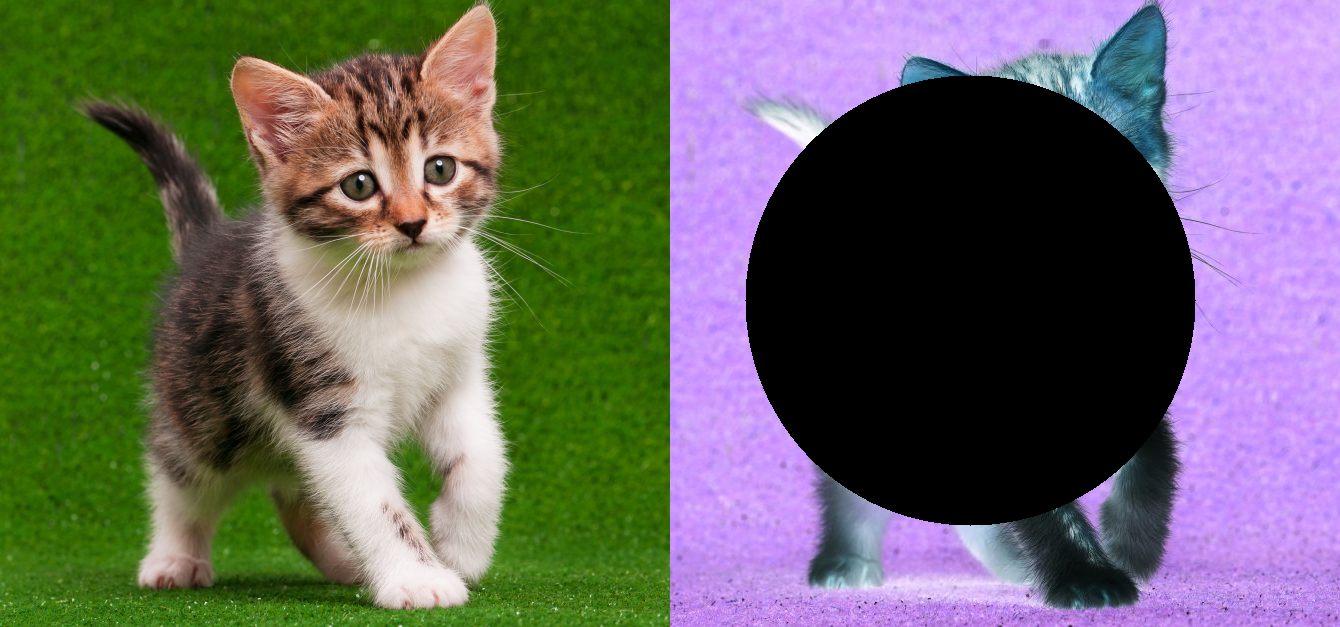

In [21]:
# Operator NOT

img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

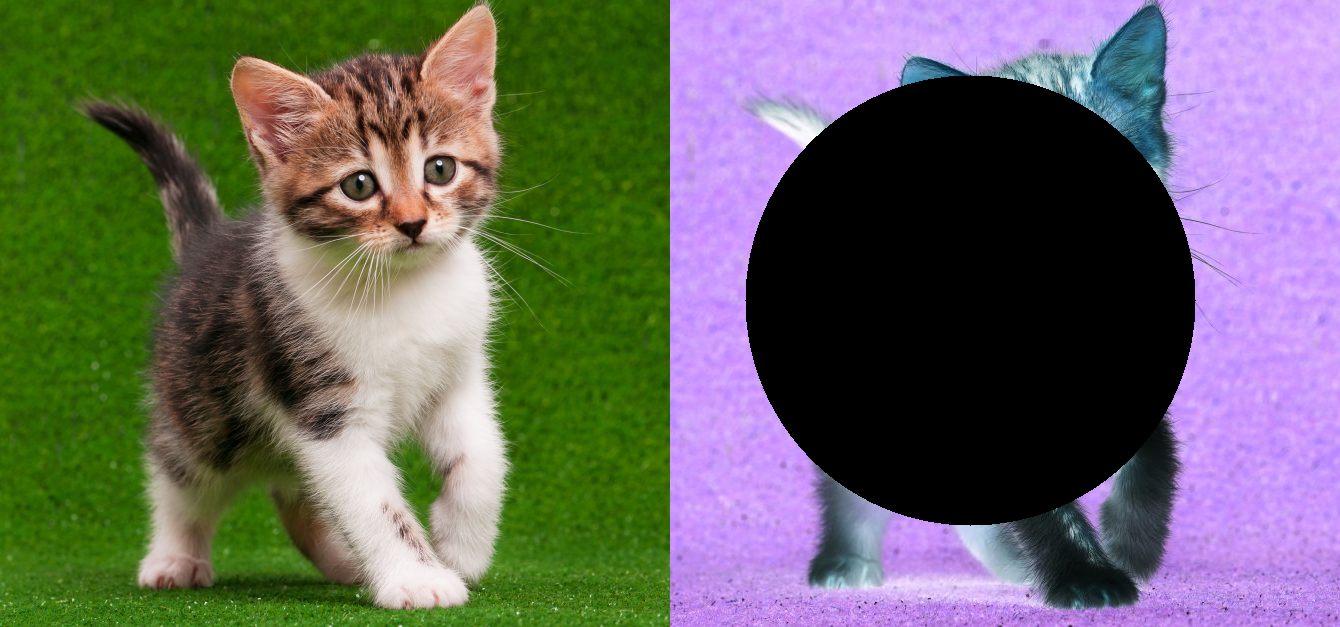

In [23]:
# Operator NAND

img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')

# Inisialisasi mask dengan nol
mask = np.zeros(img_org.shape, dtype=np.uint8)

# Tentukan pusat dan radius lingkaran
center = (300, 300)  # Pusat lingkaran
radius = 225  # Radius lingkaran

# Buat lingkaran pada mask dengan warna putih (255,255,255)
mask = cv.circle(mask, center, radius, (255, 255, 255), -1)

# Invert gambar asli dan mask
img_org_inv = ~img_org
mask_inv = ~mask

# Operasi bitwise NAND antara gambar asli yang telah di-invert dan mask yang telah di-invert
result = img_org_inv & mask_inv

# Gabungkan gambar asli dan hasil
org_frame = cv.hconcat((img_org, result))

# Tampilkan gambar
cv2_imshow(org_frame)

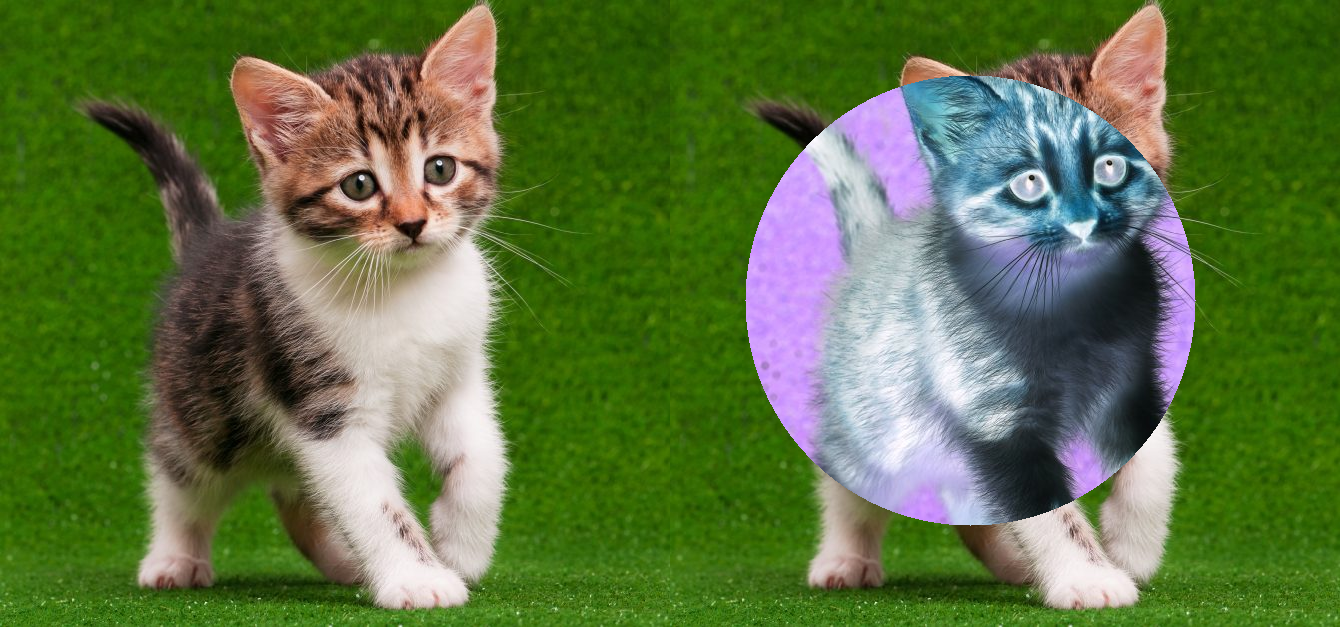

In [24]:
# Operator XOR

img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')

# Inisialisasi mask dengan nol
mask = np.zeros(img_org.shape, dtype=np.uint8)

# Tentukan pusat dan radius lingkaran
center = (300, 300)  # Pusat lingkaran
radius = 225  # Radius lingkaran

# Buat lingkaran pada mask dengan warna putih (255,255,255)
mask = cv.circle(mask, center, radius, (255, 255, 255), -1)

# Invert gambar asli dan mask
img_org_inv = ~img_org
mask_inv = ~mask

# Operasi bitwise XOR antara gambar asli yang telah di-invert dan mask yang telah di-invert
result = img_org_inv ^ mask_inv

# Gabungkan gambar asli dan hasil
org_frame = cv.hconcat((img_org, result))

# Tampilkan gambar
cv2_imshow(org_frame)